Artistic AI experiments with Deepdream algorythm
================================================

This is an adouptation of the [TensorFlow deepdream tutorial](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/tutorials/deepdream).

Setup
-----

This notebook works with Python 3.x only.

First of all install required Python libraries:

```sh
pip3 install -r requirements.txt
```

Next ensure that you have [TensorFlow](https://www.tensorflow.org/get_started/os_setup) 0.12.1 or greater. And [Jupyter Notebook](http://jupyter.org/install.html).
You can install them by PIP:

```sh
pip3 install -U tensorflow
pip3 install -U jupyter
```

In case you want to use GPU support replace `tensorflow` with `tensorwlow-gpu`.

Run
---

Simply type in console

```
jupyter-notebook
```

Then in the page opened in browser choose `artistic-ai.ipynb`.

In [1]:
#==> To try it on your machine git clone link below
#~ git clone https://github.com/artistic-ai/deepdream-tensorflow

import utils
import PIL.Image

import numpy as np 
import tensorflow as tf

utils.load_dependencies()
net = utils.Deepdream()
T = net.T


In [2]:
net.print_stats()

tmp_def = utils.rename_nodes(net.graph_def, lambda s:"/".join(s.split('_',1)))
net.show_graph(tmp_def)

Number of layers 59
Total number of feature channels: 7548


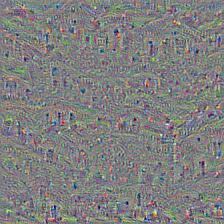

In [3]:
layer = 'mixed4d_3x3_bottleneck_pre_relu'
channel = 65

net.render_naive(T(layer)[:,:,:,channel])

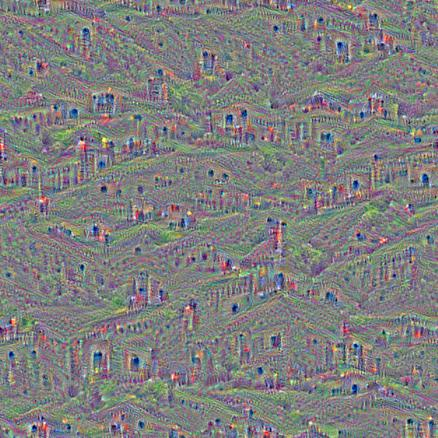

In [4]:
net.render_multiscale(T(layer)[:,:,:,channel])

In [5]:
net.show_lap_graph()

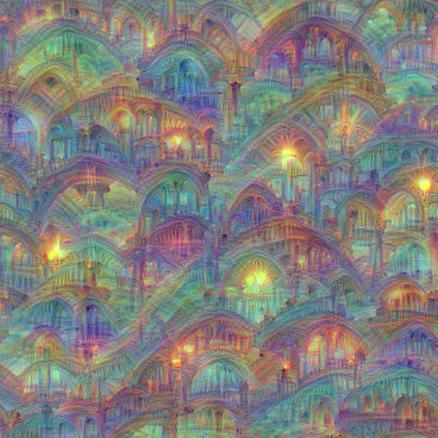

In [6]:
net.render_lapnorm(T(layer)[:, :, :, 66])

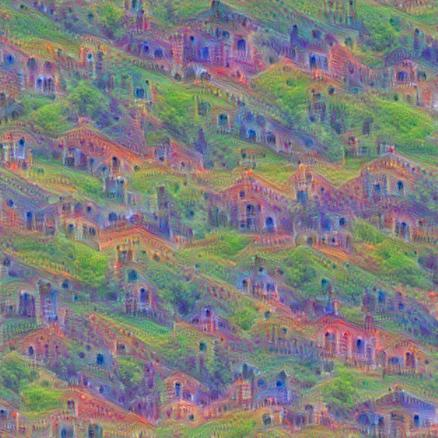

In [7]:
net.render_lapnorm(T(layer)[:,:,:,65])

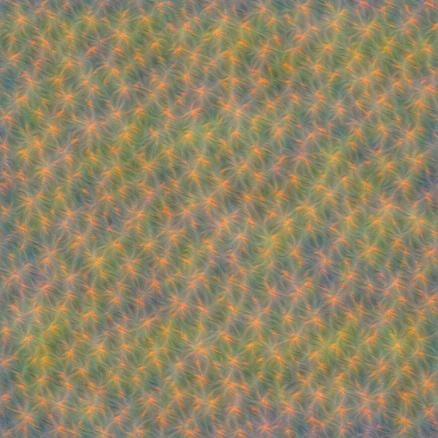

In [8]:
net.render_lapnorm(T('mixed3b_1x1_pre_relu')[:,:,:,65])

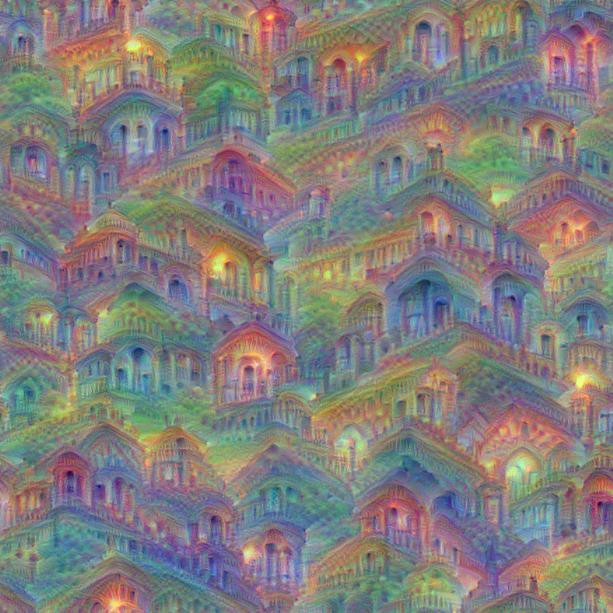

In [9]:
net.render_lapnorm(T(layer)[:,:,:,65]+T(layer)[:,:,:,66]+T(layer)[:,:,:,114], octave_n=4)

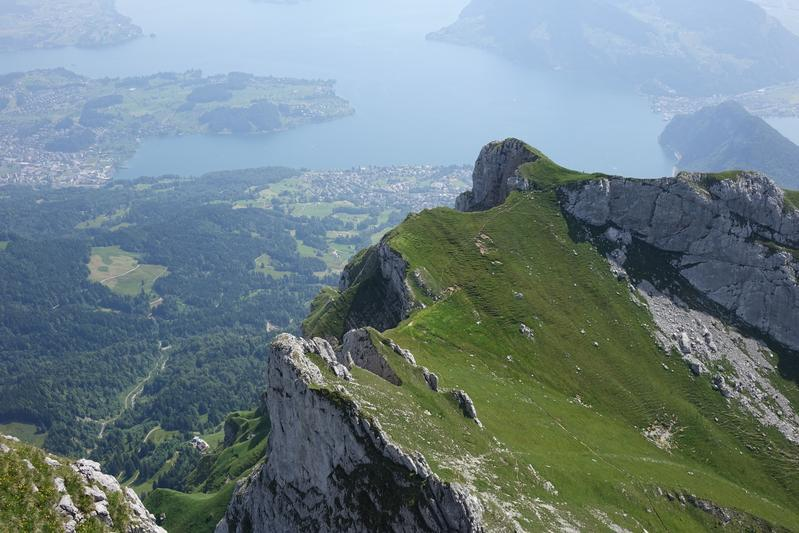

In [10]:
img0 = PIL.Image.open('images/pilatus800.jpg')
img0 = np.float32(img0)

utils.showarray(img0/255.0)

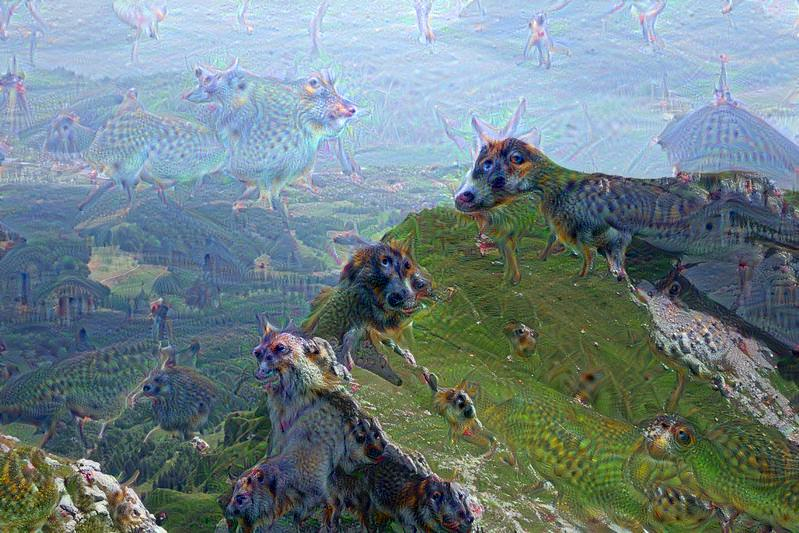

In [11]:
net.render_deepdream(tf.square(T('mixed4c')), img0)

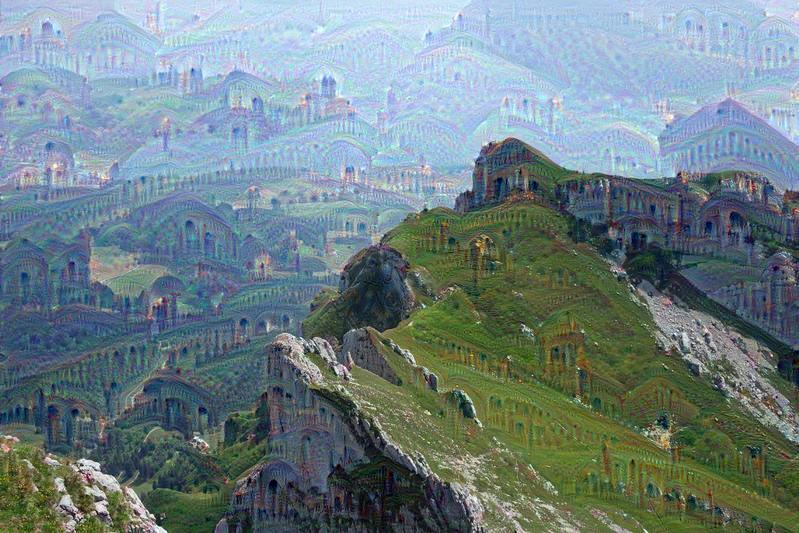

In [12]:
net.render_deepdream(tf.square(T(layer)[:,:,:,66]+T(layer)[:,:,:,65]), img0)

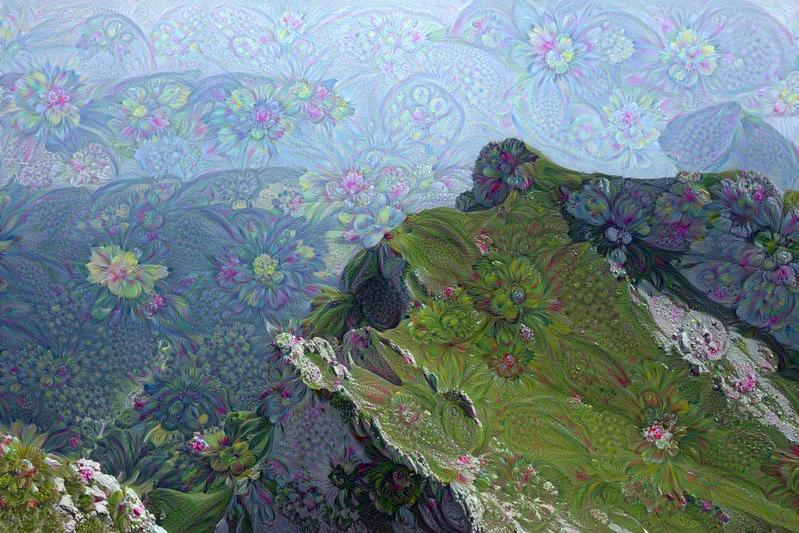

In [13]:
net.render_deepdream(T(layer)[:,:,:,139], img0)

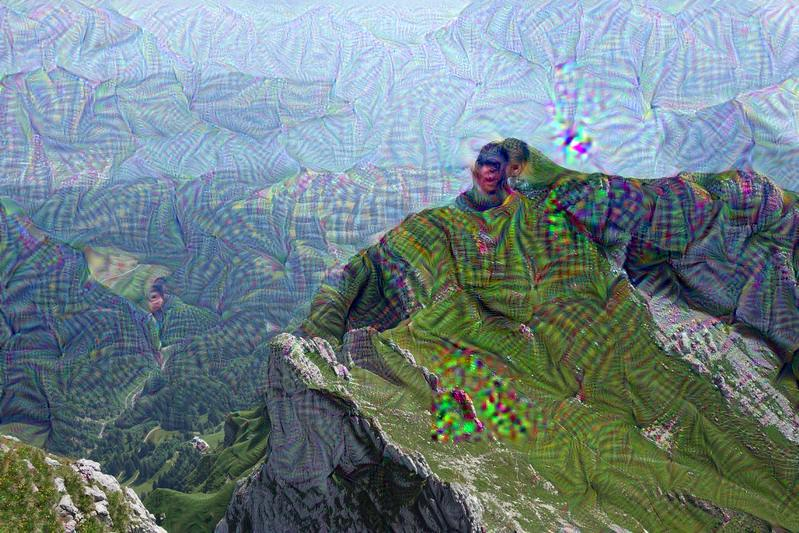

In [14]:
net.render_deepdream(tf.square(T('mixed4c')[:,:,:,139]), img0)

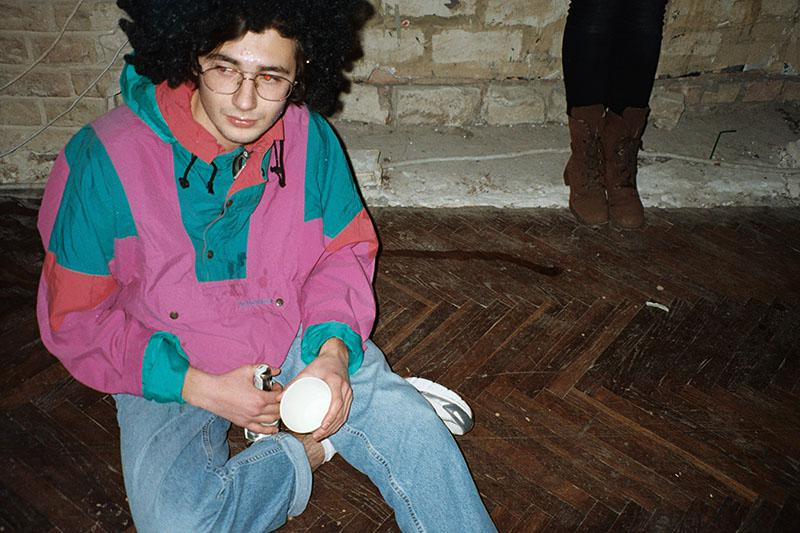

In [15]:
img0_1 = PIL.Image.open('images/AA021.jpg')
img0_1 = np.float32(img0_1)

utils.showarray(img0_1/255.0)

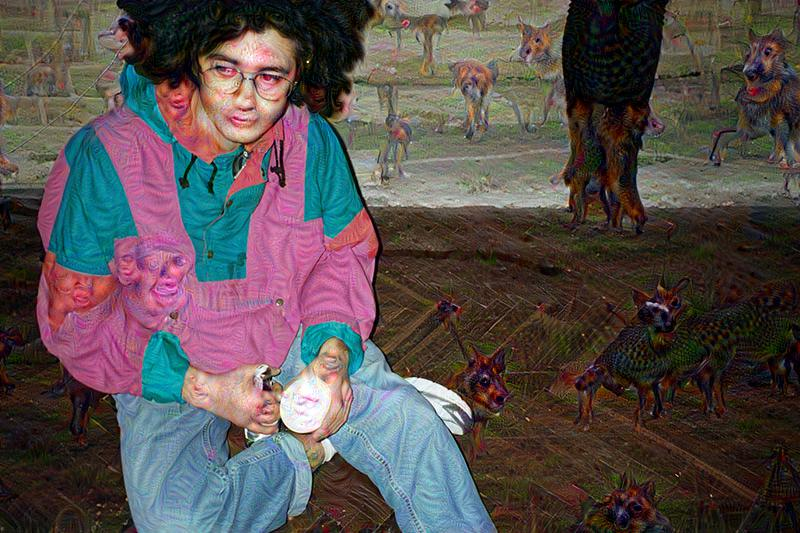

In [16]:
net.render_deepdream(tf.square(T('mixed4c')), img0_1)

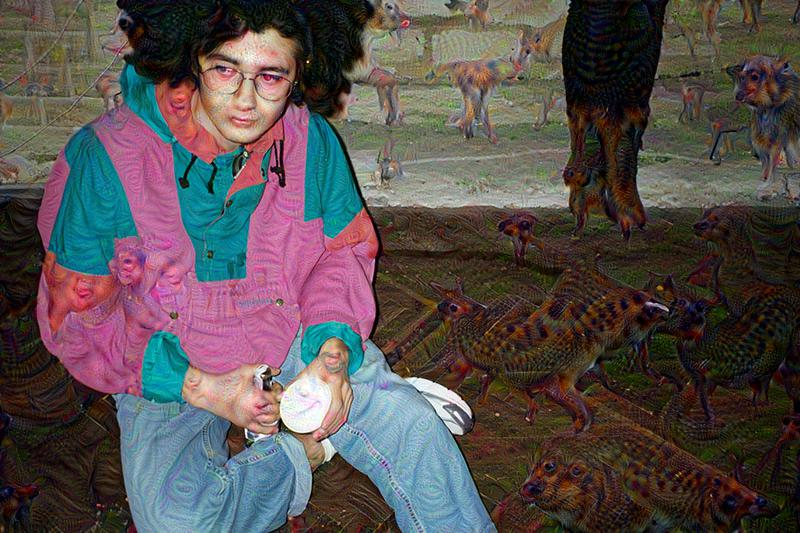

In [17]:
net.render_deepdream(T('mixed4c'), img0_1)